In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/satsin/Desktop/Battery life/Discharge_Model.csv')

In [3]:
df.head()

,Unnamed: 0,Variance(Qdlin),Minimum(Qdlin),Skewness(Qdlin),Kurtosis(Qdlin),cell_no,Qd_Cycle_2,Qd_max-2,Cycle_life,Log_Variance,Log_Mininum,Log_Skewness,Log_Kurtosis
0,0,0.000010,-0.008460,-0.532058,-1.348312,b1c0,1.070689,0.468365,1852,-5.014861,-2.072648,-0.274041,0.129790
1,1,0.000010,-0.011004,-0.429375,-1.029116,b1c1,1.075301,0.009288,2160,-5.013960,-1.958457,-0.367163,0.012464
2,2,0.000018,-0.017216,-1.080194,0.348637,b1c2,1.079922,0.008131,2237,-4.737000,-1.764058,0.033502,-0.457627
3,3,0.000036,-0.018961,-0.439050,-1.095416,b1c3,1.079723,0.006530,1434,-4.442613,-1.722149,-0.357486,0.039579
4,4,0.000023,-0.013958,-0.362548,-1.333831,b1c4,1.078417,0.005900,1709,-4.647744,-1.855177,-0.440634,0.125101


In [7]:
df = df.sample(frac = 1)

In [8]:
df.head()

,Unnamed: 0,Variance(Qdlin),Minimum(Qdlin),Skewness(Qdlin),Kurtosis(Qdlin),cell_no,Qd_Cycle_2,Qd_max-2,Cycle_life,Log_Variance,Log_Mininum,Log_Skewness,Log_Kurtosis
90,90,0.000032,-0.017059,-0.340783,-1.200764,b3c7,1.067522,0.003397,1836,-4.488742,-1.768046,-0.467522,0.079458
23,23,0.000143,-0.037213,-0.142633,-1.238482,b1c28,1.077748,0.003847,860,-3.844712,-1.429300,-0.845780,0.092890
116,116,0.000058,-0.023028,-0.296336,-1.152819,b3c35,1.063380,0.002049,1093,-4.234858,-1.637742,-0.528215,0.061761
50,50,0.000479,-0.066446,0.351602,-1.084128,b2c12,1.071276,0.417843,458,-3.320110,-1.177533,-0.453949,0.035081
22,22,0.000140,-0.035832,-0.289519,-1.236825,b1c27,1.079046,0.003953,842,-3.853703,-1.445728,-0.538324,0.092308


In [9]:
df_1 = df.drop(['cell_no','Variance(Qdlin)','Minimum(Qdlin)','Skewness(Qdlin)','Kurtosis(Qdlin)','Unnamed: 0'],axis =1)

In [10]:
df_1.head()

,Qd_Cycle_2,Qd_max-2,Cycle_life,Log_Variance,Log_Mininum,Log_Skewness,Log_Kurtosis
90,1.067522,0.003397,1836,-4.488742,-1.768046,-0.467522,0.079458
23,1.077748,0.003847,860,-3.844712,-1.429300,-0.845780,0.092890
116,1.063380,0.002049,1093,-4.234858,-1.637742,-0.528215,0.061761
50,1.071276,0.417843,458,-3.320110,-1.177533,-0.453949,0.035081
22,1.079046,0.003953,842,-3.853703,-1.445728,-0.538324,0.092308


In [11]:
from sklearn.model_selection import train_test_split
X = df_1.drop(['Cycle_life'],axis =1)
Y = df_1['Cycle_life']

In [12]:
X.head()

,Qd_Cycle_2,Qd_max-2,Log_Variance,Log_Mininum,Log_Skewness,Log_Kurtosis
90,1.067522,0.003397,-4.488742,-1.768046,-0.467522,0.079458
23,1.077748,0.003847,-3.844712,-1.429300,-0.845780,0.092890
116,1.063380,0.002049,-4.234858,-1.637742,-0.528215,0.061761
50,1.071276,0.417843,-3.320110,-1.177533,-0.453949,0.035081
22,1.079046,0.003953,-3.853703,-1.445728,-0.538324,0.092308


In [13]:
Y.head()

90     1836
23      860
116    1093
50      458
22      842
Name: Cycle_life, dtype: int64

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2,random_state=1)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
#Standardize data before
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
linreg =LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)

In [87]:
linreg.coef_

array([  66.85281419,    2.79049558, -278.26115679,  -58.52126494,
        -10.32157038,  -90.72078425])

In [88]:
linreg.intercept_

796.1616161616158

In [89]:
y_pred

array([1115.45904513, 1120.70840805,  922.33304942,  501.86853038,
       1393.70879276, 1029.46125255,  539.53983493,  556.47987013,
        895.84172875, 1121.84737882, 1744.36449498,  566.89718013,
       1469.09131863,  420.13691707,  671.91192928,  645.34483412,
       1090.75776571,  358.49082228,  850.00613335,  823.74282456,
        626.00698661,  665.5956605 ,  489.56644506,  933.31248072,
        343.42468905])

In [90]:
def Matrix(y_test,y_pred):
    import pandas as pd
    from sklearn import metrics
    from sklearn.metrics import r2_score
    x = []
    MSE = metrics.mean_squared_error(y_test,y_pred)
    MAE = metrics.mean_absolute_error(y_test,y_pred)
    RMSE= np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
    R2_Score = r2_score(y_test,y_pred)
    x.extend([MSE,MAE,RMSE,MAPE,R2_Score])
    df = pd.DataFrame(x)
    df1 = df.transpose()
    df1.columns = ['MSE','MAE','RMSE','MAPE','R2_SCORE']
    return(df1)

In [91]:
Matrix(y_test,y_pred)

,MSE,MAE,RMSE,MAPE,R2_SCORE
0,12382.462812,83.079578,111.276515,11.586237,0.912785


In [68]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.00001, l1_ratio= 0.550000)
#odel = ElasticNet(alpha=0.3, l1_ratio= 0.99)
model.fit(X_train,y_train)
y_pred_elastic =model.predict(X_test)

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.039e+05, tolerance: 1.407e+03
  model = cd_fast.enet_coordinate_descent(


In [69]:
Matrix(y_test,y_pred_elastic)

,MSE,MAE,RMSE,MAPE,R2_SCORE
0,35267.115575,120.028774,187.795409,14.916299,0.751723


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
linreg =LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)

<AxesSubplot:ylabel='Count'>

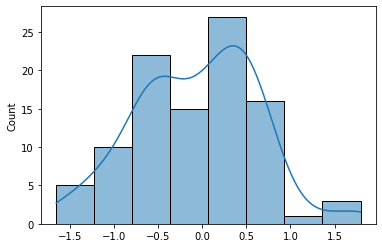

In [77]:
sns.histplot(data=X_train,x=X_train[:,2], kde=True)

In [71]:
linreg.coef_

array([ 8.63076531e+01,  1.66884400e-01,  9.29233401e+01, -5.60628951e+02,
       -1.29848065e+01, -7.15116856e+01])

In [72]:
linreg.intercept_

737.4877299626891

In [73]:
y_pred

array([ 439.24736964, 1167.63043339, 1129.27153896,  490.45643105,
        885.11234764, 1002.16657657,  860.17981278,  851.64630509,
        578.88467669,  612.30769789,  934.98581512,  642.77951319,
        650.88662098,  506.9357775 ,  655.80670252,  637.6583775 ,
       1126.37037781, 1194.67261397, 1060.8937459 , 1164.01816567,
        654.43428585, 1755.93317261, 1807.91941835, 1045.02233345,
        457.9862395 ])

In [74]:
Matrix(y_test,y_pred)

,MSE,MAE,RMSE,MAPE,R2_SCORE
0,16510.350071,98.384324,128.492607,12.787948,0.906053


In [75]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.00001, l1_ratio= 0.550000)
#odel = ElasticNet(alpha=0.3, l1_ratio= 0.99)
model.fit(X_train,y_train)
y_pred_elastic =model.predict(X_test)

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.027e+06, tolerance: 1.322e+03
  model = cd_fast.enet_coordinate_descent(


In [76]:
Matrix(y_test,y_pred_elastic)

,MSE,MAE,RMSE,MAPE,R2_SCORE
0,16444.072752,98.550855,128.234444,12.82304,0.90643


In [ ]:
# 1.